In [1]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()


Saving green_tripdata_2024-06.parquet to green_tripdata_2024-06.parquet


In [2]:
!pip install pyarrow


In [4]:
import pandas as pd

# Read the uploaded parquet file
df = pd.read_parquet('green_tripdata_2024-06.parquet')


In [5]:
# Save to CSV format
df.to_csv('green_tripdata_2024-06.csv', index=False)


In [7]:
# Download the CSV file to your system
files.download('green_tripdata_2024-06.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('green_tripdata_2024-06.csv')

# Show basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54748 entries, 0 to 54747
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               54748 non-null  int64  
 1   lpep_pickup_datetime   54748 non-null  object 
 2   lpep_dropoff_datetime  54748 non-null  object 
 3   store_and_fwd_flag     52849 non-null  object 
 4   RatecodeID             52849 non-null  float64
 5   PULocationID           54748 non-null  int64  
 6   DOLocationID           54748 non-null  int64  
 7   passenger_count        52849 non-null  float64
 8   trip_distance          54748 non-null  float64
 9   fare_amount            54748 non-null  float64
 10  extra                  54748 non-null  float64
 11  mta_tax                54748 non-null  float64
 12  tip_amount             54748 non-null  float64
 13  tolls_amount           54748 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [9]:
# Drop the 'ehail_fee' column
df.drop(columns=['ehail_fee'], inplace=True)


In [11]:
# Safely convert datetime columns with error handling
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], dayfirst=True, errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], dayfirst=True, errors='coerce')

# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60


In [12]:
# Extract weekday
df['weekday'] = df['lpep_dropoff_datetime'].dt.day_name()

# Show count of each weekday
df['weekday'].value_counts()


,count
weekday,
Saturday,5959
Wednesday,3778
Friday,3673
Tuesday,3445
Thursday,2140
Monday,1969
Sunday,1887


In [13]:
# Extract hour of day
df['hourofday'] = df['lpep_dropoff_datetime'].dt.hour

# Show count of each hour
df['hourofday'].value_counts()


,count
hourofday,
17.0,1780
18.0,1774
16.0,1617
15.0,1536
19.0,1473
14.0,1346
9.0,1242
12.0,1204
10.0,1197


In [14]:
# Check missing values
df.isnull().sum()

# Impute numeric columns with mean (example: RatecodeID, passenger_count, etc.)
num_cols = ['RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute categorical column 'store_and_fwd_flag' with mode
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)


<ipython-input-14-108da4c95aa7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-14-108da4c95aa7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

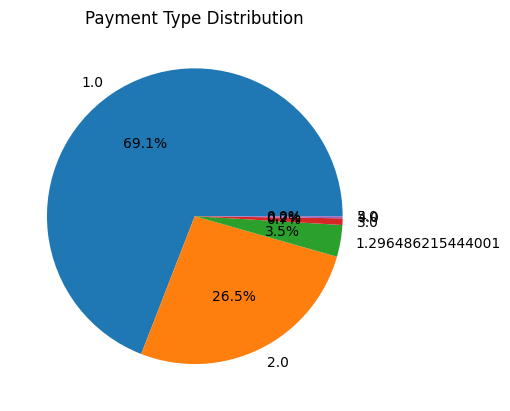

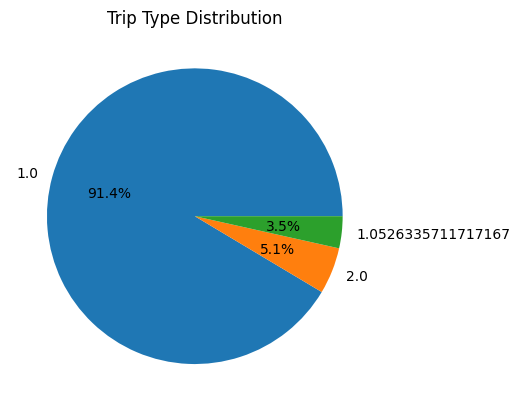

In [15]:
import matplotlib.pyplot as plt

# Pie for payment_type
df['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', title='Payment Type Distribution')
plt.ylabel('')
plt.show()

# Pie for trip_type
df['trip_type'].value_counts().plot.pie(autopct='%1.1f%%', title='Trip Type Distribution')
plt.ylabel('')
plt.show()


In [16]:
# Group by weekday and calculate average total_amount
df.groupby('weekday')['total_amount'].mean().sort_index()


,total_amount
weekday,
Friday,25.247125
Monday,24.787633
Saturday,24.497865
Sunday,24.086105
Thursday,24.196051
Tuesday,25.887837
Wednesday,24.253295


In [17]:
# Group by payment_type and calculate average total_amount
df.groupby('payment_type')['total_amount'].mean()


,total_amount
payment_type,
1.000000,26.129556
1.296486,33.086467
2.000000,21.168663
3.000000,6.437551
4.000000,1.784298
5.000000,35.362500


In [18]:
# Group by weekday and calculate average tip_amount
df.groupby('weekday')['tip_amount'].mean().sort_index()


,tip_amount
weekday,
Friday,2.761054
Monday,2.711625
Saturday,2.597503
Sunday,2.559894
Thursday,2.648089
Tuesday,2.951353
Wednesday,2.557591


In [19]:
# Group by payment_type and calculate average tip_amount
df.groupby('payment_type')['tip_amount'].mean()


,tip_amount
payment_type,
1.000000,3.639034
1.296486,4.070111
2.000000,0.000000
3.000000,0.000000
4.000000,0.000000
5.000000,0.000000


In [20]:
from scipy.stats import f_oneway

# Get total_amount groups based on trip_type
trip1 = df[df['trip_type'] == 1]['total_amount']
trip2 = df[df['trip_type'] == 2]['total_amount']

# Perform ANOVA test
f_stat, p_value = f_oneway(trip1, trip2)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 4804.279410250526
p-value: 0.0


In [21]:
# Group by each weekday
groups = [group['total_amount'] for name, group in df.groupby('weekday')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 3.7127203201861163
p-value: 0.0010829012642755772


In [22]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['trip_type'], df['payment_type'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 54544.42465598396
p-value: 0.0


In [23]:
# Listing numeric variables
numeric_vars = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
    'trip_duration', 'passenger_count'
]

# Check if all columns exist
df[numeric_vars].head()


,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,trip_duration,passenger_count
0,1.76,12.1,1.00,0.5,2.92,0.0,1.0,0.00,10.716667,1.0
1,1.36,8.6,1.00,0.5,1.00,0.0,1.0,0.00,6.933333,1.0
2,3.00,19.1,3.75,1.5,4.85,0.0,1.0,2.75,19.083333,1.0
3,2.99,16.3,1.00,0.5,0.00,0.0,1.0,0.00,12.833333,1.0
4,6.45,30.3,1.00,0.5,6.56,0.0,1.0,0.00,NaN,1.0


In [24]:
# Listing object (categorical) variables
object_vars = [
    'store_and_fwd_flag', 'RatecodeID', 'payment_type',
    'trip_type', 'weekday', 'hourofday'
]

# Display unique values of each
for col in object_vars:
    print(f"{col} -> {df[col].unique()}")


store_and_fwd_flag -> ['N' 'Y']
RatecodeID -> [ 1.          5.          2.          4.         99.          3.
  1.25516093]
payment_type -> [1.         2.         3.         4.         5.         1.29648622]
trip_type -> [1.         2.         1.05263357]
weekday -> ['Saturday' nan 'Tuesday' 'Wednesday' 'Monday' 'Thursday' 'Friday'
 'Sunday']
hourofday -> [ 0. nan  1. 23.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.
 16. 17. 18. 19. 21. 20. 22.]


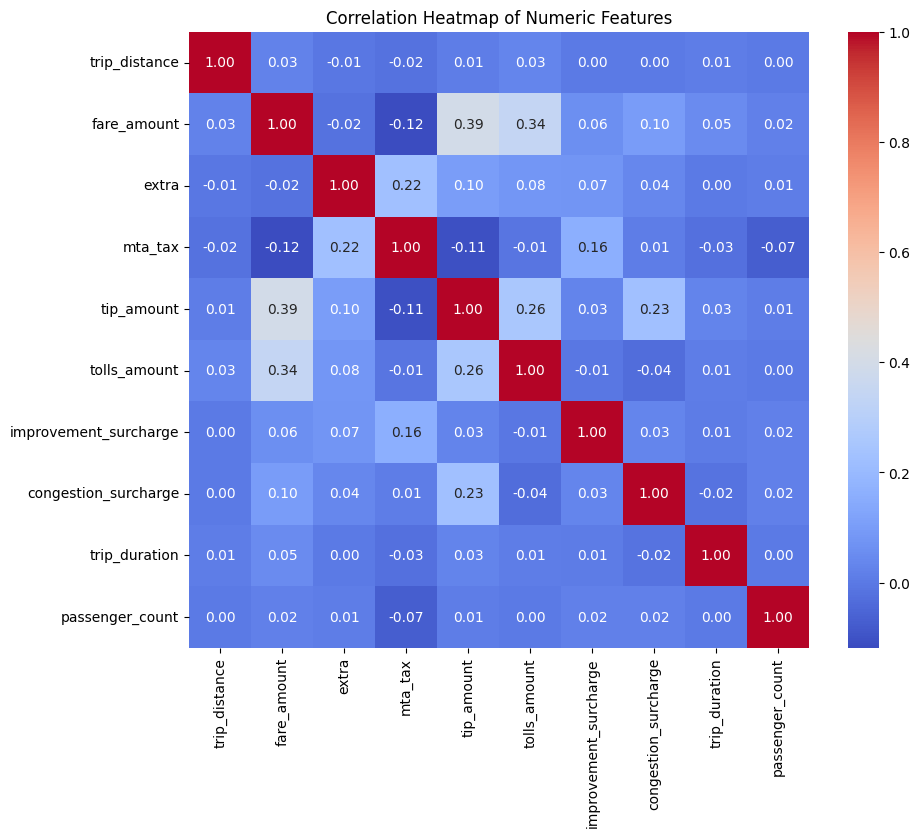

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_matrix = df[numeric_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [26]:
# Dummy encode object vars (drop_first to avoid dummy trap)
df_encoded = pd.get_dummies(df, columns=object_vars, drop_first=True)


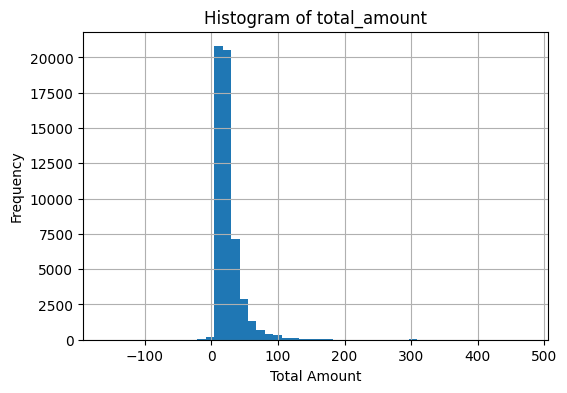

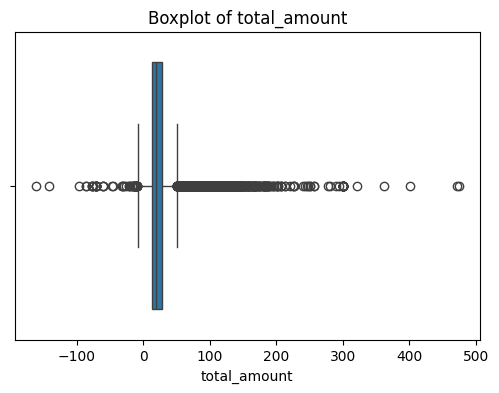

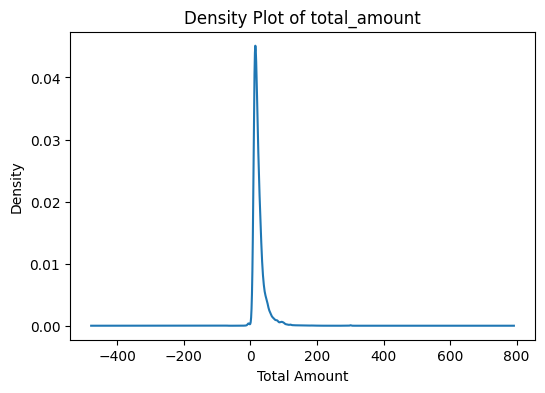

In [27]:
# Histogram
plt.figure(figsize=(6, 4))
df['total_amount'].hist(bins=50)
plt.title('Histogram of total_amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot of total_amount')
plt.show()

# Density Plot
plt.figure(figsize=(6, 4))
df['total_amount'].plot(kind='kde')
plt.title('Density Plot of total_amount')
plt.xlabel('Total Amount')
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# ✅ 1. Select target and features
X = df_encoded.drop(columns=['total_amount'])
y = df_encoded['total_amount']

In [33]:
# ✅ 2. Convert everything to numeric just in case
X = X.apply(pd.to_numeric, errors='coerce')


In [34]:
# ✅ 3. Handle inf and NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [35]:
# ✅ 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
# ✅ 5. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("🔹 Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("🔹 MSE:", mean_squared_error(y_test, y_pred_lr))


🔹 Linear Regression R²: -0.00022557340861517616
🔹 MSE: 396.27611384304555


In [37]:
# ✅ 6. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("🔹 Decision Tree R²:", r2_score(y_test, y_pred_dt))

🔹 Decision Tree R²: 0.9960847784825418


In [38]:
# ✅ 7. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest R²:", r2_score(y_test, y_pred_rf))

🔹 Random Forest R²: 0.9976779926896107


In [39]:
# ✅ 8. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("🔹 Gradient Boosting R²:", r2_score(y_test, y_pred_gb))

🔹 Gradient Boosting R²: 0.9973195132191508


In [43]:
!streamlit run app.py


/bin/bash: line 1: streamlit: command not found
